In [6]:
import pandas as pd
import numpy as np

In [4]:
import os
import sys
sys.path.append("/home/magody/programming/python/data_science/lib/scrapping")
# from ScrappingSelenium import merge_shards # type: ignore


In [62]:
            
def merge_shards(path_shards:str, header:list, path_output:str = None)->pd.DataFrame:
    if path_shards.endswith("/"):
        path_shards = path_shards[:-1]
        
    if path_output is not None:
        if path_output.endswith("/"):
            path_output = path_output[:-1]
        
    shards = os.listdir(path_shards)
    print(f"Shards: {len(shards)}")

    df = pd.DataFrame(columns=header)

    for shard in shards:
        file_name = f"{path_shards}/{shard}"
        df_to_join = pd.read_csv(file_name)
        if len(df_to_join) == 0:
            print(f"Shard: {shard} is empty")
            continue
        df = pd.concat([df, df_to_join], axis=0, ignore_index=True)
        
    if path_output is not None:
        df.to_csv(f"{path_output}/merged_shards.csv",index=False)
    return df

header = ["title","title_alternative1","title_alternative2","rating","votes","type_serie","cover","state","followers","categories","related","episodes","description","reactions_like","reactions_funny","reactions_love","reactions_surprise","reactions_angry","reactions_sad","reactions_total"]

df_dataset = merge_shards("shards", header)

Shards: 40
Shard: db_job-2_items-run-4.csv is empty


In [63]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3557 non-null   object 
 1   title_alternative1  3550 non-null   object 
 2   title_alternative2  3557 non-null   object 
 3   rating              3557 non-null   float64
 4   votes               3557 non-null   object 
 5   type_serie          3557 non-null   object 
 6   cover               3557 non-null   object 
 7   state               3557 non-null   object 
 8   followers           3557 non-null   object 
 9   categories          3479 non-null   object 
 10  related             1785 non-null   object 
 11  episodes            3557 non-null   float64
 12  description         3319 non-null   object 
 13  reactions_like      3557 non-null   object 
 14  reactions_funny     3557 non-null   object 
 15  reactions_love      3557 non-null   object 
 16  reacti

In [67]:
columns = df_dataset.columns.values
columns_with_nan = []
for column in columns:
    if df_dataset[column].isnull().sum() > 0:
        columns_with_nan.append(column)

print(columns_with_nan)

['title_alternative1', 'categories', 'related', 'description']


In [66]:
mask_not_found = df_dataset["state"] == "404 not found"

df_dataset[mask_not_found].to_csv("not_found_animes.csv",index=False)

df_dataset = df_dataset[~mask_not_found]



In [69]:
df_dataset["related"].replace({np.nan:"none"}, inplace=True)
df_dataset["categories"].fillna("unknown", inplace=True)
df_dataset["title_alternative1"].fillna("none", inplace=True)
df_dataset["description"].fillna("No description", inplace=True)


In [70]:
df_dataset = df_dataset.astype({
    "rating": "float16",
    "votes": "int64",
    "followers": "int64",
    "episodes": "float32",
    "reactions_like": "int64",
    "reactions_funny": "int64",
    "reactions_love": "int64",
    "reactions_surprise": "int64",
    "reactions_angry": "int64",
    "reactions_sad": "int64",
    "reactions_total": "int64",
})
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3502 entries, 0 to 3556
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3502 non-null   object 
 1   title_alternative1  3502 non-null   object 
 2   title_alternative2  3502 non-null   object 
 3   rating              3502 non-null   float16
 4   votes               3502 non-null   int64  
 5   type_serie          3502 non-null   object 
 6   cover               3502 non-null   object 
 7   state               3502 non-null   object 
 8   followers           3502 non-null   int64  
 9   categories          3502 non-null   object 
 10  related             3502 non-null   object 
 11  episodes            3502 non-null   float32
 12  description         3502 non-null   object 
 13  reactions_like      3502 non-null   int64  
 14  reactions_funny     3502 non-null   int64  
 15  reactions_love      3502 non-null   int64  
 16  reacti

In [71]:
df_dataset.describe()

,rating,votes,followers,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,4.410156,635.084809,5225.292690,16.060822,65.396916,15.676471,356.751856,11.833238,9.348087,18.334666,477.341234
std,0.333740,1195.975664,9826.480335,33.419640,260.028563,64.880988,1316.864464,53.995273,43.426499,181.612439,1771.654398
min,1.700195,2.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.300781,69.250000,501.250000,6.000000,6.000000,0.000000,13.000000,1.000000,0.000000,0.000000,23.000000
50%,4.500000,224.000000,1646.000000,12.000000,15.000000,2.000000,51.000000,2.000000,2.000000,1.000000,77.000000
75%,4.601562,646.500000,5570.750000,14.000000,46.000000,10.000000,210.000000,7.000000,6.000000,5.000000,296.750000
max,4.800781,18636.000000,161819.000000,1040.000000,8499.000000,2079.000000,29363.000000,1479.000000,1101.000000,7882.000000,43371.000000


In [35]:
df_dataset.duplicated().sum()

0

In [72]:
# Remove the bot interactions
df_dataset["reactions_like"] = df_dataset["reactions_like"].apply(lambda x: x-1)
df_dataset["reactions_total"] = df_dataset["reactions_total"].apply(lambda x: x-1)

In [73]:


df_dataset = pd.concat([
    df_dataset,
    df_dataset.iloc[:,-7:-1].div(df_dataset.iloc[:,-1], axis=0).add_suffix('_relative')
], axis=1)

df_dataset.head()


,title,title_alternative1,title_alternative2,rating,votes,type_serie,cover,state,followers,categories,...,reactions_surprise,reactions_angry,reactions_sad,reactions_total,reactions_like_relative,reactions_funny_relative,reactions_love_relative,reactions_surprise_relative,reactions_angry_relative,reactions_sad_relative
0,Rozen Maiden: Ouvertüre,none,none,4.601562,38,OVA,https://www3.animeflv.net/uploads/animes/cover...,FINALIZADO,306,Acción|Comedia|Drama|Magia|Seinen,...,1,0,2,21,0.190476,0.000000,0.666667,0.047619,0.000000,0.095238
1,Bleach: Memories of Nobody,none,none,4.500000,191,PELÍCULA,https://www3.animeflv.net/uploads/animes/cover...,FINALIZADO,1379,Acción|Aventuras|Superpoderes,...,2,0,9,158,0.202532,0.018987,0.708861,0.012658,0.000000,0.056962
2,Futari wa Precure: Splash☆Star Movie - Tick Ta...,none,none,4.398438,15,PELÍCULA,https://www3.animeflv.net/uploads/animes/cover...,FINALIZADO,92,Fantasía|Infantil|Magia|Shoujo,...,0,1,0,13,0.153846,0.000000,0.769231,0.000000,0.076923,0.000000
3,Mai-Otome Zwei,My Otome Zwei,舞-乙HiME Zwei,4.500000,19,OVA,https://www3.animeflv.net/uploads/animes/cover...,FINALIZADO,106,Acción|Magia,...,0,0,0,5,0.400000,0.000000,0.600000,0.000000,0.000000,0.000000
4,Freedom,FREEDOM,none,4.500000,15,OVA,https://www3.animeflv.net/uploads/animes/cover...,FINALIZADO,101,Acción|Aventuras|Ciencia Ficción,...,0,0,1,12,0.583333,0.000000,0.333333,0.000000,0.000000,0.083333


In [49]:
import seaborn as sns

<AxesSubplot:xlabel='rating', ylabel='Count'>

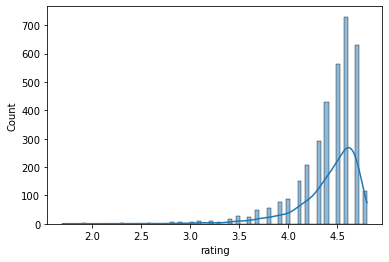

In [51]:
sns.histplot(df_dataset["rating"], kde=True)

In [53]:
df_dataset.columns.values

array(['title', 'title_alternative1', 'title_alternative2', 'rating',
       'votes', 'type_serie', 'cover', 'state', 'followers', 'categories',
       'related', 'episodes', 'description', 'reactions_like',
       'reactions_funny', 'reactions_love', 'reactions_surprise',
       'reactions_angry', 'reactions_sad', 'reactions_total',
       'reactions_like_relative', 'reactions_funny_relative',
       'reactions_love_relative', 'reactions_surprise_relative',
       'reactions_angry_relative', 'reactions_sad_relative'], dtype=object)

In [59]:
columns_relevant = ['title', 'votes', 'type_serie', 'followers', 'categories',
       'episodes', 'reactions_like',
       'reactions_funny', 'reactions_love', 'reactions_surprise',
       'reactions_angry', 'reactions_sad', 'reactions_total']

In [77]:
mask_minimum_reactions_total = df_dataset["reactions_total"] > 20

What about unknown or less than that? are not valid? or are only unknown gems?

In [78]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_like_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
2186,Ken En Ken: Aoki Kagayaki,286,ANIME,2549,Acción|Artes Marciales|Aventuras|Demonios|Fant...,13.0,26,0,9,6,0,0,41
207,Hakyuu Houshin Engi,187,ANIME,1734,Aventuras|Demonios|Fantasía|Shounen|Sobrenatural,24.0,16,0,8,1,1,1,27
1771,Buki yo Saraba,30,PELÍCULA,240,Acción|Ciencia Ficción|Drama,1.0,17,0,10,2,0,0,29
2577,Guyver: Out of Control,26,PELÍCULA,124,Acción|Ciencia Ficción|Superpoderes|Terror,1.0,17,0,7,2,2,2,30
963,God Eater Prologue,94,OVA,883,Acción|Ciencia Ficción|Fantasía|Militar,1.0,40,1,23,2,4,1,71
3202,Dorei-ku The Animation,426,ANIME,4569,Drama|Psicológico,12.0,32,0,18,5,2,0,57
2136,Egao no Daika,494,ANIME,3837,Drama|Fantasía|Militar|Recuentos de la vida,12.0,12,2,8,0,0,0,22
3097,Space Adventure Cobra The Movie,35,PELÍCULA,84,Acción|Aventuras|Ciencia Ficción|Espacial,1.0,19,1,14,0,0,1,35
1060,Gunslinger Girl,78,ANIME,839,Acción|Ciencia Ficción|Drama|Militar|Psicológico,13.0,17,0,11,2,0,2,32
2224,Shigurui,161,ANIME,1719,Acción|Artes Marciales|Drama|Historico|Samurai...,12.0,34,4,20,1,4,1,64


In [79]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_funny_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
2882,Gakuen Handsome,424,ANIME,1213,Comedia|Escolares|Parodia|Yaoi,12.0,22,426,140,21,41,14,664
3189,Back Street Girls: Gokudolls,632,ANIME,4782,Comedia|Ecchi|Seinen,10.0,6,62,43,0,2,0,113
1131,Chikku Neesan,187,ANIME,1228,Comedia|Escolares,1.0,8,56,40,2,0,2,108
3171,Asobi Asobase,1999,ANIME,12799,Comedia|Drama|Escolares,14.0,37,344,299,5,4,5,694
229,Poputepipikku,813,ANIME,5033,Comedia,13.0,16,64,47,2,2,1,132
2892,Ao Oni The Animation,67,ANIME,362,Comedia|Terror,13.0,5,17,8,0,7,1,38
2249,Otome wa Boku ni Koishiteru Special,15,OVA,164,Comedia|Escolares|Romance,1.0,3,12,8,2,2,1,28
1908,Danshi Koukousei no Nichijou,1394,ANIME,10913,Comedia|Escolares|Recuentos de la vida|Shounen,18.0,37,201,261,2,2,3,506
712,Aho Girl,1677,ANIME,18800,Comedia|Escolares|Romance,12.0,53,303,401,7,16,3,783
2579,Tenkuu no Shiro Laputa,196,PELÍCULA,1368,Aventuras|Ciencia Ficción|Fantasía|Romance,1.0,30,93,114,0,2,2,241


In [85]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_love_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
1330,Hanayamata,224,ANIME,800,Comedia|Escolares|Recuentos de la vida|Seinen,12.0,0,0,32,0,1,0,33
759,Starmyu 2nd Season,205,ANIME,768,Escolares|Música|Recuentos de la vida,12.0,1,0,31,0,0,0,32
952,Yumeiro Patissiere,240,ANIME,1418,Escolares|Infantil|Shoujo,51.0,4,0,149,2,0,0,155
2820,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,230,ANIME,403,Drama|Josei,12.0,1,0,23,0,0,0,24
2025,Senki Zesshou Symphogear XV,266,ANIME,1332,Acción|Ciencia Ficción|Música,13.0,0,0,23,0,0,1,24
2482,Saint Tail,113,ANIME,472,Aventuras|Magia|Romance|Shoujo,43.0,1,0,39,0,1,0,41
654,Junjou Romantica 2,575,ANIME,4725,Comedia|Drama|Romance|Yaoi,12.0,24,2,621,3,2,3,655
1955,Sekaiichi Hatsukoi 2,717,ANIME,4466,Comedia|Drama|Romance|Yaoi,13.0,25,1,722,9,5,1,763
1215,Junjou Romantica OVA,288,OVA,2265,Comedia|Drama|Romance|Yaoi,2.0,18,5,499,4,1,1,528
1658,Uta no☆Prince-sama♪ Maji Love Revolutions,188,ANIME,1487,Comedia|Escolares|Harem|Música|Romance|Shoujo,13.0,3,0,48,0,0,0,51


In [81]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_surprise_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
1892,Wasurenagumo,57,OVA,424,Comedia|Sobrenatural,1.0,11,1,11,18,2,2,45
560,Queen's Blade: Vanquished Specials,36,OVA,663,Ecchi,4.0,6,2,21,13,4,0,46
1896,Gyo,121,OVA,789,Terror,1.0,32,2,29,30,10,8,111
374,Pupa,466,ANIME,3033,Fantasía|Psicológico|Terror,12.0,34,7,127,69,30,8,275
2324,Under the Dog,122,OVA,776,Acción|Ciencia Ficción|Suspenso,1.0,9,0,11,8,1,3,32
521,Tenshi no Drop,58,OVA,253,Comedia|Ecchi|Shounen|Yuri,1.0,6,8,25,14,5,4,62
3400,Mardock Scramble: The First Compression,79,PELÍCULA,572,Acción|Ciencia Ficción|Psicológico,1.0,11,0,7,5,1,0,24
3102,Chirin no Suzu,20,PELÍCULA,66,Aventuras|Drama|Fantasía,1.0,8,1,5,7,5,10,36
615,Sengoku Basara,110,ANIME,1744,Acción|Artes Marciales|Historico|Samurai|Super...,13.0,6,0,15,5,0,0,26
2556,Umezu Kazuo no Noroi,38,OVA,134,Terror,1.0,19,1,12,9,6,0,47


In [82]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_angry_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
3120,Shingeki no Kyojin Live Action,1044,PELÍCULA,1634,unknown,1.0,177,188,263,73,1026,50,1777
2948,Sabiiro no Armor: Reimei,470,ANIME,933,Historico|Samurai,12.0,26,17,38,8,98,24,211
2083,Ex-Arm,2655,ANIME,5250,Acción|Ecchi|Seinen|Sobrenatural,12.0,172,179,256,74,642,69,1392
2544,Urusei Yatsura Movie 6: Itsudatte My Darling,39,PELÍCULA,161,Acción|Aventuras|Ciencia Ficción|Comedia|Drama...,1.0,8,6,19,1,24,2,60
273,Time Bokan: Gyakushuu no San Akunin,234,ANIME,135,Aventuras|Comedia|Mecha,24.0,3,0,1,4,9,6,23
1901,Sekiei Ayakashi Mangatan,20,ANIME,125,Fantasía|Historico|Sobrenatural,3.0,8,1,5,0,8,0,22
1617,Pokemon XY: Odemashi Ko Majin Fuupa,42,OVA,210,Acción|Fantasía|Infantil,1.0,16,6,30,6,36,5,99
303,Soul Eater Not!,256,ANIME,1766,Acción|Comedia|Ecchi|Shounen|Sobrenatural,12.0,8,2,29,4,19,1,63
3419,Iron Man,70,ANIME,784,Acción|Drama|Mecha,12.0,9,7,6,8,13,1,44
3133,Furusato Meguri Nippon no Mukashibanashi,258,ANIME,464,Historico|Infantil|Sobrenatural,6.0,19,17,19,6,28,7,96


In [83]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_sad_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
2566,Hotaru no Haka,594,PELÍCULA,3581,Drama|Historico,1.0,58,17,167,9,7,999,1257
1144,Ano Hi Mita Hana no Namae o Boku-tachi wa Mada...,2367,ANIME,15000,Drama|Recuentos de la vida|Sobrenatural,11.0,83,11,409,13,10,935,1461
970,Tokyo Magnitude 8.0,506,ANIME,2922,Drama,11.0,21,2,60,3,2,151,239
2192,Kimi no Suizou wo Tabetai,3693,PELÍCULA,14107,Drama,1.0,201,44,1298,34,21,2454,4052
1652,Plastic Memories,2717,ANIME,17202,Ciencia Ficción|Drama|Romance,13.0,114,12,557,21,8,1018,1730
2562,Mobile Suit Gundam 0080: War in the Pocket,56,OVA,156,Aventuras|Ciencia Ficción|Drama|Espacial|Mecha...,6.0,2,0,7,0,0,12,21
1760,Gekijouban Ano Hi Mita Hana no Namae o Bokutac...,850,PELÍCULA,5169,Drama|Recuentos de la vida|Sobrenatural,1.0,68,7,294,13,7,513,902
3073,Shigatsu wa Kimi no Uso,5895,ANIME,38380,Drama|Escolares|Música|Romance|Shounen,23.0,327,68,2768,47,32,3456,6698
3181,Banana Fish,3821,ANIME,31858,Acción|Aventuras|Drama|Shoujo,24.0,552,115,3328,131,73,4194,8393
2205,Clannad,1489,ANIME,14538,Comedia|Drama|Escolares|Recuentos de la vida|R...,24.0,104,13,339,9,9,456,930


In [84]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["followers", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
851,One Piece,18636,ANIME,161819,Acción|Aventuras|Comedia|Drama|Fantasía|Shoune...,1016.0,2859,827,13767,627,512,433,19025
289,Black Clover (TV),13228,ANIME,126032,Acción|Comedia|Fantasía|Magia|Shounen,170.0,1288,266,6947,227,136,152,9016
755,Boruto: Naruto Next Generations,10503,ANIME,122410,Acción|Artes Marciales|Aventuras|Shounen|Super...,248.0,2781,516,6036,406,1101,344,11184
2067,Kimetsu no Yaiba,14817,ANIME,112908,Acción|Demonios|Historico|Shounen|Sobrenatural,26.0,3105,437,16923,444,240,343,21492
458,Jujutsu Kaisen (TV),10909,ANIME,104991,Acción|Demonios|Escolares|Shounen|Sobrenatural...,24.0,2220,376,11985,357,166,156,15260
1836,Tokyo Revengers,8525,ANIME,89792,Acción|Drama|Escolares|Shounen,24.0,1803,220,12525,430,238,529,15745
1867,Boku no Hero Academia 5th Season,6098,ANIME,81761,Acción|Comedia|Escolares|Shounen|Superpoderes,25.0,1747,244,14078,351,215,166,16801
2285,Naruto Shippuden,10120,ANIME,77485,Acción|Artes Marciales|Comedia|Shounen|Superpo...,500.0,6046,1144,21671,1203,653,1119,31836
2617,Boku no Hero Academia,6512,ANIME,73543,Acción|Comedia|Escolares|Shounen|Superpoderes,15.0,2779,469,13429,378,258,186,17499
541,Shingeki no Kyojin,7257,ANIME,69157,Acción|Drama|Fantasía|Shounen|Superpoderes,25.0,1614,241,8270,470,205,375,11175


In [86]:
df_dataset[mask_minimum_reactions_total].sort_values(by=["followers", "reactions_love_relative", "rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)

,title,votes,type_serie,followers,categories,episodes,reactions_like,reactions_funny,reactions_love,reactions_surprise,reactions_angry,reactions_sad,reactions_total
851,One Piece,18636,ANIME,161819,Acción|Aventuras|Comedia|Drama|Fantasía|Shoune...,1016.0,2859,827,13767,627,512,433,19025
289,Black Clover (TV),13228,ANIME,126032,Acción|Comedia|Fantasía|Magia|Shounen,170.0,1288,266,6947,227,136,152,9016
755,Boruto: Naruto Next Generations,10503,ANIME,122410,Acción|Artes Marciales|Aventuras|Shounen|Super...,248.0,2781,516,6036,406,1101,344,11184
2067,Kimetsu no Yaiba,14817,ANIME,112908,Acción|Demonios|Historico|Shounen|Sobrenatural,26.0,3105,437,16923,444,240,343,21492
458,Jujutsu Kaisen (TV),10909,ANIME,104991,Acción|Demonios|Escolares|Shounen|Sobrenatural...,24.0,2220,376,11985,357,166,156,15260
1836,Tokyo Revengers,8525,ANIME,89792,Acción|Drama|Escolares|Shounen,24.0,1803,220,12525,430,238,529,15745
1867,Boku no Hero Academia 5th Season,6098,ANIME,81761,Acción|Comedia|Escolares|Shounen|Superpoderes,25.0,1747,244,14078,351,215,166,16801
2285,Naruto Shippuden,10120,ANIME,77485,Acción|Artes Marciales|Comedia|Shounen|Superpo...,500.0,6046,1144,21671,1203,653,1119,31836
2617,Boku no Hero Academia,6512,ANIME,73543,Acción|Comedia|Escolares|Shounen|Superpoderes,15.0,2779,469,13429,378,258,186,17499
541,Shingeki no Kyojin,7257,ANIME,69157,Acción|Drama|Fantasía|Shounen|Superpoderes,25.0,1614,241,8270,470,205,375,11175


df_dataset[mask_minimum_reactions_total].sort_values(by=["reactions_sad_relative""rating", "votes"], ascending=False).loc[:, columns_relevant].head(10)			